<a href="https://colab.research.google.com/github/Lajs5257/DevF-MachineLearning/blob/main/01_tree_based_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TREES

las principales ventajas de los árboles son:

* Capturan relaciones no lineales entre los features y la variable target
* Necesitan muy poco pre-procesado (p.ej. son invariantes al escalado de las variables) 
* Permiten trabajar con diferentes tipos de variables (continuas, discretas).

Cuando se entrena un árbol de clasificación, el árbol aprende una secuencia de preguntas _if-else_ donde cada pregunta involucra una variable y un punto de corte.

Ejemplo para detectar cancer benigno o maligno:

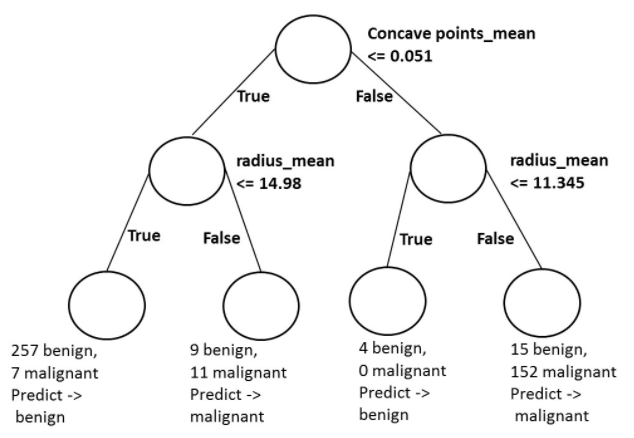

En la parte superior, el árbol pregunta:

* la media de los puntos cóncavos de una instancia es menor o igual a 0.051
    * Si es así, la instancia atraviesa la rama True 
    * de lo contrario, atraviesa la rama False. 
    
Del mismo modo, la instancia sigue atravesando las ramas internas hasta que llega a su fin. Entonces, se predice que la etiqueta de la instancia será la de la clase predominante en ese extremo. 

El número máximo de ramas que separan la parte superior de un extremo se conoce como __`maximum depth`__ que en este ejemplo es igual a 2.

Un modelo de clasificación divide el espacio de las variables en regiones y los puntos que caen en una región dada son asignados con la clase asociada a esa región.

* __Desicion region__(Región de desisión): región en el espacio de variables donde se le asigna una clase a cada punto (instancia), está separada por superficies llamadas __Desicion Boundary__

* __Desicion Boundary__(límites de desición): superfices que separan diferentes regiones de desición

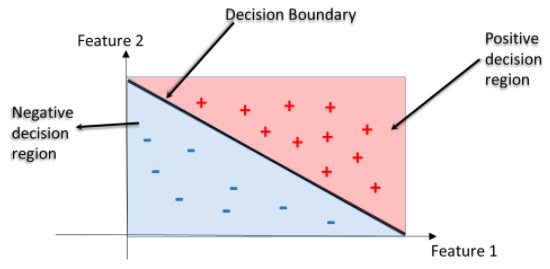

__Un árbol de decisiones es una estructura de datos que consta de una jerarquía de unidades individuales llamadas nodos. Un nodo es un punto que involucra una pregunta o una predicción__.

Tipos de nodos:

* __`Root`__: nodo en el que el árbol de decisiones comienza a crecer. No tiene nodo padre e implica una pregunta que da lugar a 2 nodos hijos a través de dos ramas.

* __`Internal node`__: Un nodo interno es un nodo que tiene un padre. También implica una pregunta que da lugar a 2 nodos secundarios. 

* __`Leaf`__: Un nodo que no tiene hijos se llama `Leaf` (hoja). Una hoja tiene un nodo padre y no implica preguntas. Es donde se hace una predicción. 

Cuando un árbol de clasificación se entrena en un conjunto de datos etiquetado, el árbol aprende patrones de las variables de tal manera que produce las hojas más puras. En otras palabras, el árbol se entrena de tal manera que, en cada hoja, predomina una etiqueta de clase.

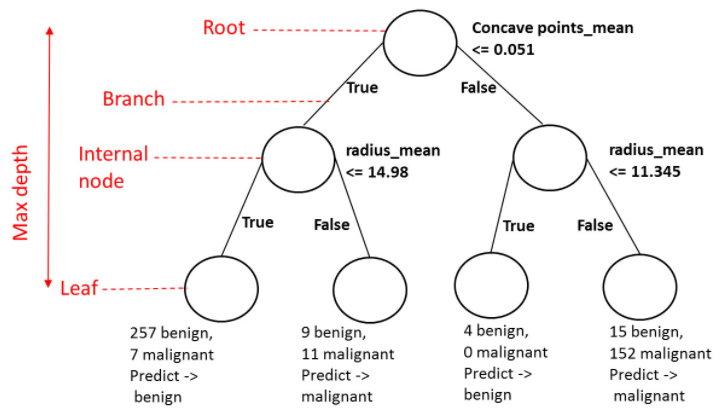

Para entender cómo un árbol de clasificación produce hojas lo más puras posibles, primero debemos conocer el concepto de ganancia de información.

Los nodos de un árbol de clasificación crecen de forma recursiva; es decir, la obtención de un nodo interno o de una hoja depende del estado de sus predecesores. Para producir las hojas más puras posibles, en cada nodo, un árbol hace una pregunta que involucra una variable f y un punto de corte (split point) sp.

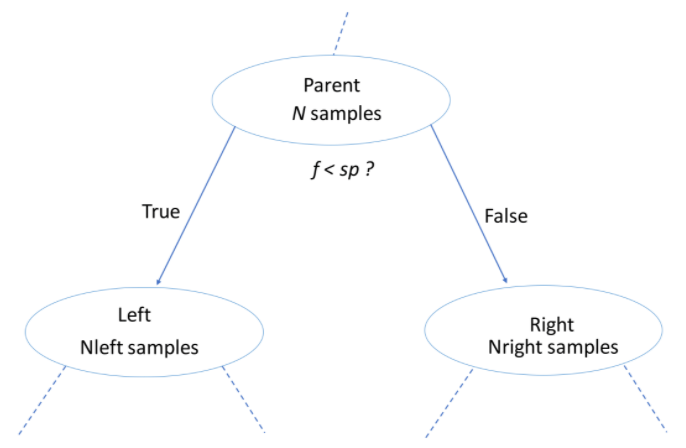

¿Cómo sabe el algoritmo qué función y qué punto de división elegir?

¡Lo hace maximizando la ganancia de información! El árbol considera que cada nodo contiene información y tiene como objetivo maximizar la ganancia de información obtenida después de cada división.

Ejemplo:

Considere el caso en el que un nodo con N muestras se divide en un nodo izquierdo con N muestras (NLeft) y un nodo derecho con N muestras (Nright).

la formula de la [ganancia de información (IG)](https://victorzhou.com/blog/information-gain/) está dada por:

$$
IG(f, sp) = I(parent) - \Big{(} \frac{N_{left}}{N}I(left) + \frac{N_{right}}{N}I(right)  \Big{)}
$$

donde:

* $f$ feature / variable

* $sp$ split point / punto de corte

* $I(node)$ impureza del nodo que puede ser medida por:
  + __Gini index__: Es una medida de la probabilidad de una incorrecta clasificación de una observación
  + __Entropía__: Mide la aleatoriedad en la información procesada (la pureza de la partición). Entre mas alta sea la entropía, mas difícil será concluir un resultado


Entropy is nothing just the measure of disorder, or measure of purity. __Basically, it is the measurement of the impurity or randomness in the data points__.

-Lyman

## CART (classification and regression trees)

### [Trees for classification](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Cargamos los datos
cancer = pd.read_csv('https://raw.githubusercontent.com/edroga/Datasets_for_projects/main/cancer.csv')
cancer.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [ ]:
# obtenemos dummies
cancer_dummies = (pd.get_dummies(cancer,
                                columns = ['diagnosis'],
                                drop_first = [True],
                                prefix = ['D'])
                  .loc[:,['D_M','radius_mean', 'concave points_mean']]
                  )

cancer_dummies.head(3)

,D_M,radius_mean,concave points_mean
0,1,17.99,0.14710
1,1,20.57,0.07017
2,1,19.69,0.12790


In [ ]:
# obtenemos los arreglos numpy
X = cancer_dummies.copy().drop(columns=['D_M']).values
y = cancer_dummies.copy()['D_M'].values


In [ ]:
# partimos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    stratify=y,
                                                    random_state=1)

In [ ]:
# instanciamos y ajustamos el modelo
dt = DecisionTreeClassifier(max_depth=4, 
                            random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [ ]:
# Generamos pronosticos
y_pred = dt.predict(X_test)

In [ ]:
# obtenemos accuracy
print('accuracy: ', accuracy_score(y_test, y_pred))
print('-'*30)
# obtenemos precision
print('precision:', precision_score(y_test, y_pred))
print('-'*30)
# obtenemos recall
print('recall:   ', recall_score(y_test, y_pred))
print('-'*30)
# obtenemos f1
print('f1:       ', f1_score(y_test, y_pred))

accuracy:  0.9035087719298246
------------------------------
precision: 0.8444444444444444
------------------------------
recall:    0.9047619047619048
------------------------------
f1:        0.8735632183908046


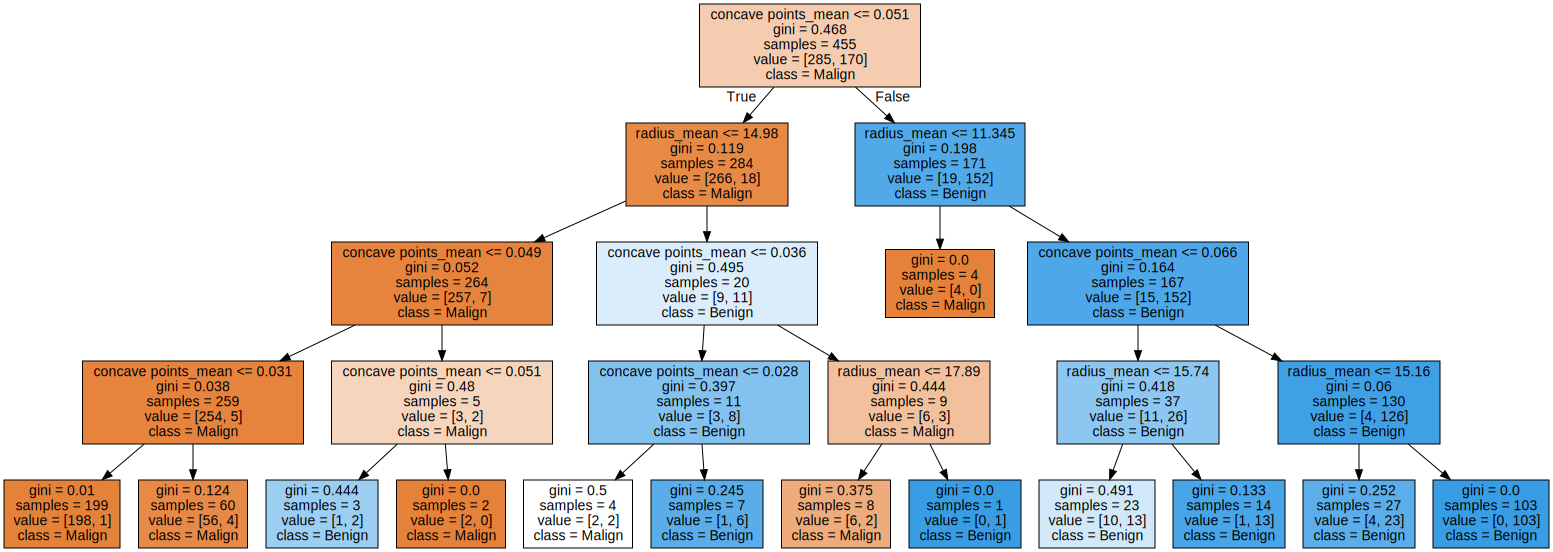

In [ ]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=['radius_mean', 'concave points_mean'],  
                                class_names=['Malign', 'Benign'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
# plot_tree de sklearn 


#### Entropy vs Gini

Entrenamos usando Entropía como criterio

In [ ]:
# Entrenamos usando Entropía como criterio de información
from sklearn.tree import DecisionTreeClassifier

dt_entropy = DecisionTreeClassifier(max_depth=8,
                                    criterion='entropy',
                                    random_state=1)

dt_entropy.fit(X_train,y_train)
y_pred = dt_entropy.predict(X_test)

In [ ]:
# obtenemos accuracy
print('accuracy: ', accuracy_score(y_test, y_pred))
print('-'*30)
# obtenemos precision
print('precision:', precision_score(y_test, y_pred))
print('-'*30)
# obtenemos recall
print('recall:   ', recall_score(y_test, y_pred))
print('-'*30)
# obtenemos f1
print('f1:       ', f1_score(y_test, y_pred))

accuracy:  0.8859649122807017
------------------------------
precision: 0.8536585365853658
------------------------------
recall:    0.8333333333333334
------------------------------
f1:        0.8433734939759037


Entrenamos usando gini como criterio

In [ ]:
# Entrenamos usando Entropía como criterio de información

from sklearn.tree import DecisionTreeClassifier
dt_entropy = DecisionTreeClassifier(max_depth=8,
                                    criterion='gini',
                                    random_state=1)

dt_entropy.fit(X_train,y_train)
y_pred = dt_entropy.predict(X_test)

In [ ]:
# obtenemos accuracy
print('accuracy: ', accuracy_score(y_test, y_pred))
print('-'*30)
# obtenemos precision
print('precision:', precision_score(y_test, y_pred))
print('-'*30)
# obtenemos recall
print('recall:   ', recall_score(y_test, y_pred))
print('-'*30)
# obtenemos f1
print('f1:       ', f1_score(y_test, y_pred))

accuracy:  0.9210526315789473
------------------------------
precision: 0.9024390243902439
------------------------------
recall:    0.8809523809523809
------------------------------
f1:        0.8915662650602411


In [ ]:
accuracy:  0.8859649122807017
------------------------------
precision: 0.8536585365853658
------------------------------
recall:    0.8333333333333334
------------------------------
f1:        0.8433734939759037

### [Trees for Regression](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

In [ ]:
# Importamos DecisionTreeRegressor a partir del modulo sklearn.tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# Cargamos los datos
auto = (pd.read_csv('https://raw.githubusercontent.com/edroga/Datasets_for_projects/main/mpg.csv')
        .dropna()
        .loc[:,['displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'cylinders', 'mpg']]
        )

In [ ]:
auto.head(3)

,displacement,horsepower,weight,acceleration,model_year,origin,cylinders,mpg
0,307.0,130.0,3504,12.0,70,usa,8,18.0
1,350.0,165.0,3693,11.5,70,usa,8,15.0
2,318.0,150.0,3436,11.0,70,usa,8,18.0


In [ ]:
# binarizamos las columnas
auto = pd.get_dummies(auto,
                   columns = ['origin'],
                   drop_first = [True], # Tiramos la primera categoria para no tener problemas de multicolinealidad
                   prefix = ['o']
                   )

In [ ]:
# Inspeccionamos los datos nuevamente
auto.head(3)

,displacement,horsepower,weight,acceleration,model_year,cylinders,mpg,o_japan,o_usa
0,307.0,130.0,3504,12.0,70,8,18.0,0,1
1,350.0,165.0,3693,11.5,70,8,15.0,0,1
2,318.0,150.0,3436,11.0,70,8,18.0,0,1


In [ ]:
# obtenemos los arreglos numpy
X = auto.copy().drop(columns=['mpg']).values
y = auto.copy()['mpg'].values

In [ ]:
# Partimos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state=1)

In [ ]:
# Instanciamos y ajustamos un modelo
dt = DecisionTreeRegressor(max_depth=4,
                           min_samples_leaf = 0.4,
                           random_state=3)

dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.4, random_state=3)

In [ ]:
# generamos pronosticos
y_pred = dt.predict(X_test)

In [ ]:
# obtenemos algunas metricas
mean_squared_error(y_test, y_pred)**(1/2)

5.548589104121745

## Ensemble Learning

Limitaciones de los CARTS:

* Sensible a pequeñas variaciones en el conjunto de entrenamiento. 
* Alta varianza: los CART sin restricciones sufren de sobreajuste

una posible solución es usar __Ensemble Learning__, que se resume de la siguiente forma:

* Entrena diferentes modelos sobre el mismo dataset
* Deja que cada modelo haga su predicción
* Un metamodelo agrega las predicciones de cada modelo
* El metamodelo arroja una predicción final (más robusta y menos propensa a errores)
  - para clasificación se puede usar Hard Voting
  - para regresión se puede usar el promedio.



Ejemplo para clasificación:

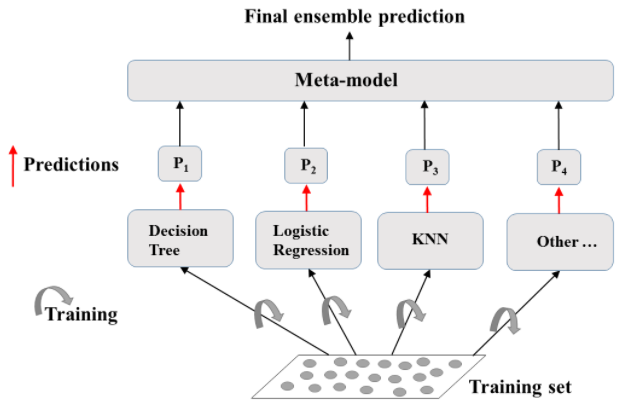

Metamodelo: __Hard Voting__

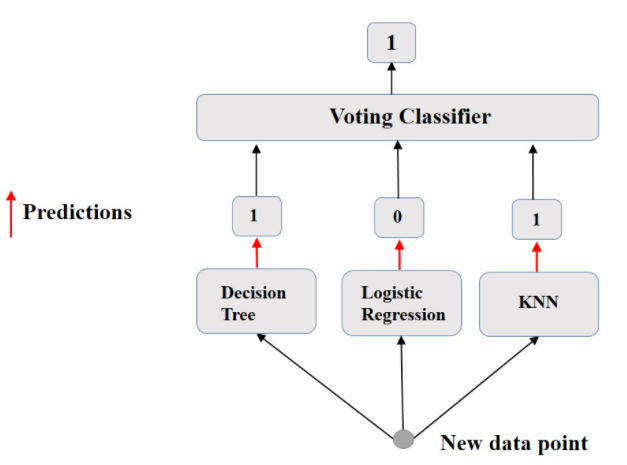

Ejemplo para usar ensemble learning en scikit learn



```python
from sklearn.ensemble import VotingClassifier # para clasificación
from sklearn.ensemble import VotingRegressor # para regresión
```



In [ ]:
# Importamos modelos, incluido el meta modelo VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN

from sklearn.ensemble import VotingClassifier

In [ ]:
# Cargamos los datos
cancer = pd.read_csv('https://raw.githubusercontent.com/edroga/Datasets_for_projects/main/cancer.csv')

# obtenemos dummies
cancer_dummies = (pd.get_dummies(cancer,
                                columns = ['diagnosis'],
                                drop_first = [True],
                                prefix = ['D'])
                  .loc[:,['D_M','radius_mean', 'concave points_mean']]
                  )

In [ ]:
# obtenemos los arreglos numpy
X = cancer_dummies.copy().drop(columns=['D_M']).values
y = cancer_dummies.copy()['D_M'].values

In [ ]:
# partimos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size= 0.50,
                                                    random_state= 123)

In [ ]:
# Instanciamos los clasificadores individuales
lr = LogisticRegression(random_state=123)
knn = KNN()
dt = DecisionTreeClassifier(random_state=123)

In [ ]:
# Definimos una lista de tuplas con (nombre_del_clasificador, clasificador)
classifiers = [('Logistic Regression', lr),
               ('K Nearest Neighbours', knn),
               ('Classification Tree', dt)]

In [ ]:
# Para comparar, veamos los resultados individuales 

for clf_name, clf in classifiers:
    # Ajustamos sobre train    
    clf.fit(X_train, y_train)
    # Generamos pronosticos con test    
    y_pred = clf.predict(X_test)
    # Evaluamos las metricas
    print('-'*30)
    print(clf_name)
    print('accuracy: ', accuracy_score(y_test, y_pred))
    print('precision:', precision_score(y_test, y_pred))
    print('recall:   ', recall_score(y_test, y_pred))
    print('f1:       ', f1_score(y_test, y_pred))


------------------------------
Logistic Regression
accuracy:  0.887719298245614
precision: 0.865979381443299
recall:    0.8155339805825242
f1:        0.8399999999999999
------------------------------
K Nearest Neighbours
accuracy:  0.9052631578947369
precision: 0.9318181818181818
recall:    0.7961165048543689
f1:        0.8586387434554973
------------------------------
Classification Tree
accuracy:  0.9017543859649123
precision: 0.8640776699029126
recall:    0.8640776699029126
f1:        0.8640776699029126


In [ ]:
# Instanciamos el VotingClassifier 'vc'
vc = VotingClassifier(estimators=classifiers) 
# Ajustamos sobre train
vc.fit(X_train, y_train)   
y_pred = vc.predict(X_test)
# Evaluamos las metricas
print('-'*30)
print('ensambe VotingClassifier')
print('accuracy: ', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:   ', recall_score(y_test, y_pred))
print('f1:       ', f1_score(y_test, y_pred))

------------------------------
ensambe VotingClassifier
accuracy:  0.9157894736842105
precision: 0.9438202247191011
recall:    0.8155339805825242
f1:        0.8749999999999999


In [ ]:
------------------------------
ensambe VotingClassifier
accuracy:  0.9157894736842105
precision: 0.9438202247191011
recall:    0.8155339805825242
f1:        0.8749999999999999
------------------------------
Logistic Regression
accuracy:  0.887719298245614
precision: 0.865979381443299
recall:    0.8155339805825242
f1:        0.8399999999999999
------------------------------
K Nearest Neighbours
accuracy:  0.9052631578947369
precision: 0.9318181818181818
recall:    0.7961165048543689
f1:        0.8586387434554973
------------------------------
Classification Tree
accuracy:  0.9017543859649123
precision: 0.8640776699029126
recall:    0.8640776699029126
f1:        0.8640776699029126

## BAGGING

Bagging es un método de ensamblaje y significa __Bootstrap Aggregation__ ya que se apoya del uso de Bootstrap. 

Las características de __Hard Voting__ son:

* Se usa el mismo conjunto de entrenamiento
* Se usan diferentes modelos

Las características de __Bagging__ son:

* Se usan diferentes conjuntos de entrenamiento
* Se usa el mismo modelo


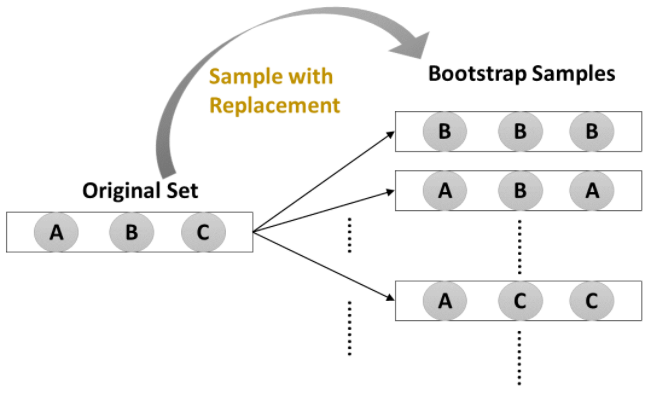

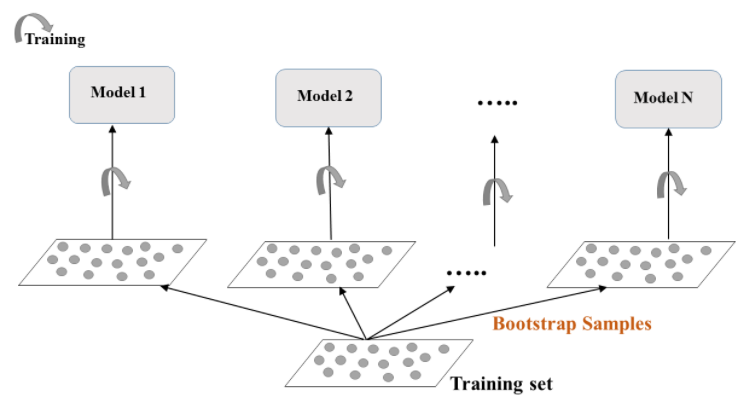

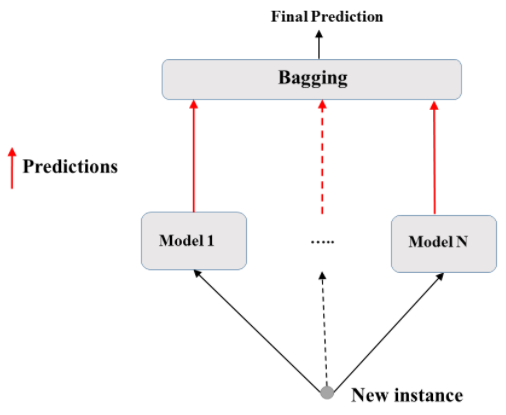

Ejemplo para usar BAGGING en scikit learn



```python
from sklearn.ensemble import BaggingClassifier # para clasificación
from sklearn.ensemble import BaggingRegressor # para regresión
```



In [ ]:
# Importamos los modelos
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Cargamos los datos
cancer = pd.read_csv('https://raw.githubusercontent.com/edroga/Datasets_for_projects/main/cancer.csv')

# obtenemos dummies
cancer_dummies = (pd.get_dummies(cancer,
                                columns = ['diagnosis'],
                                drop_first = [True],
                                prefix = ['D'])
                  .loc[:,['D_M','radius_mean', 'concave points_mean']]
                  )

In [ ]:
# obtenemos los arreglos numpy
X = cancer_dummies.copy().drop(columns=['D_M']).values
y = cancer_dummies.copy()['D_M'].values

In [ ]:
# Partimos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y,
                                                    random_state=123)

In [ ]:
# Instanciamos un regresión logística - lr
lr = LogisticRegression()

In [ ]:
# Instanciamos un BaggingClassifier - bc
bc = BaggingClassifier(base_estimator=lr, 
                       n_estimators=40, # Cantidad de modelos que seran usados
                       n_jobs=-1) # swifter 

In [ ]:
# Ajustamos el modelo
bc.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=40,
                  n_jobs=-1)

In [ ]:
y_pred = bc.predict(X_test)

In [ ]:
# obtenemos accuracy
print('accuracy: ', accuracy_score(y_test, y_pred))
print('-'*30)
# obtenemos precision
print('precision:', precision_score(y_test, y_pred))
print('-'*30)
# obtenemos recall
print('recall:   ', recall_score(y_test, y_pred))
print('-'*30)
# obtenemos f1
print('f1:       ', f1_score(y_test, y_pred))

accuracy:  0.9005847953216374
------------------------------
precision: 0.8852459016393442
------------------------------
recall:    0.84375
------------------------------
f1:        0.864


## Random Forests

Random Forests es un modelo ensemble de muchos árboles entrenados con diferentes subconjuntos de datos y diferentes subconjuntos de variables del dataset de entrenamiento. 

Esto permite que los árboles del bosque sean diferentes entre ellos. De hecho, cada árbol se especializa en un aspecto diferente del dataset (sobreajusta al subconjunto de datos con los que se ha entrenado ese árbol), pero como la predicción es un promedio de las predicciones de todos los árboles, al final el bosque es capaz de reducir la varianza.

Cuando usamos Bagging teniamos que:

* Usamos un estimador base: Decision Tree, Logistic Regression, KNN, etc
* Cada estimador es entrenado en una muestra bootstrap distinta del training set
* Los estimadores usan todas las variables para ser entrenados y para crear predicciones


los Random Forest usan:

* estimador base: Decision trees
* Cada estimador es entrenado en una muestra bootstrap distinta con el mismo tamaño del conjunto de entrenamiento
* Introducen mas factores aleatorios al entrenar árboles individuales, cuando un árbol es entrenado:
  - se toma una muestra de $d$ features (variables) por cada nodo sin reemplazo ($d$ es menor que el número total de variables)



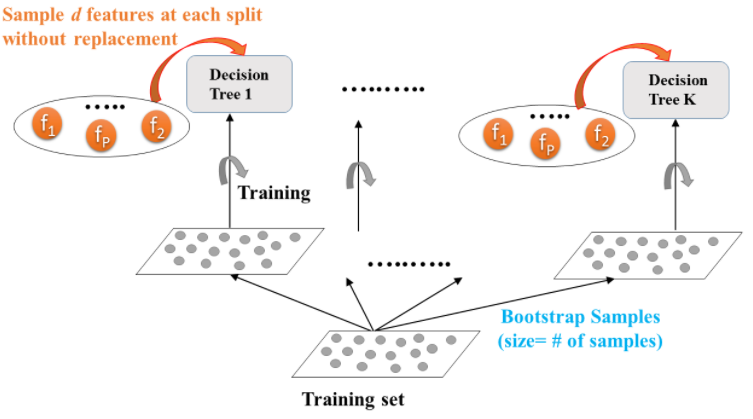

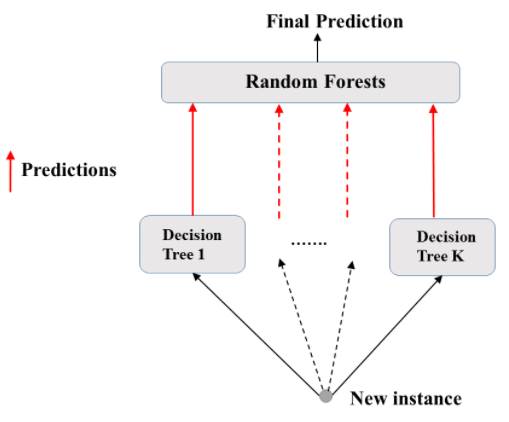

Ejemplo para usar Ranfom Forest en scikit learn

```python
from sklearn.ensemble import RandomForestClassifier # para clasificación
from sklearn.ensemble import RandomForestRegressor # para regresión
```

In [ ]:
# Cargamos los datos
auto = (pd.read_csv('https://raw.githubusercontent.com/edroga/Datasets_for_projects/main/mpg.csv')
        .dropna()
        .loc[:,['displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'cylinders', 'mpg']]
        )

# binarizamos las columnas
auto = pd.get_dummies(auto,
                   columns = ['origin'],
                   drop_first = [True],
                   prefix = ['o']
                   )

# obtenemos los arreglos numpy
X = auto.copy().drop(columns=['mpg'])
y = auto.copy()['mpg'].values

In [ ]:
# Partimos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state=1)

In [ ]:
X_train

,displacement,horsepower,weight,acceleration,model_year,cylinders,o_japan,o_usa
338,135.0,84.0,2490,15.7,81,4,0,1
260,225.0,110.0,3620,18.7,78,6,0,1
141,98.0,83.0,2219,16.5,74,4,0,0
312,86.0,65.0,2019,16.4,80,4,1,0
353,105.0,74.0,2190,14.2,81,4,0,0
...,...,...,...,...,...,...,...,...
205,97.0,75.0,2155,16.4,76,4,1,0
257,232.0,90.0,3210,17.2,78,6,0,1
73,307.0,130.0,4098,14.0,72,8,0,1
237,98.0,63.0,2051,17.0,77,4,0,1


In [ ]:
# Importamos RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instanciamos el rf
rf = RandomForestRegressor(n_estimators=25,
                           random_state=2)
            
# Ajustamos sobre datos de entrenamiento    
rf.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=25, random_state=2)

In [ ]:
# Evaluamos sobre RMSE
from sklearn.metrics import mean_squared_error as MSE

# Generamos pronosticos
y_pred = rf.predict(X_test)

rmse_test = MSE(y_test, y_pred)**(1/2)

print('RMSE: {:.2f}'.format(rmse_test))

RMSE: 3.16


Obtenemos las variables mas importantes para el modelo

In [ ]:
dir(rf)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_compute_oob_predictions',
 '_compute_partial_dependence_recursion',
 '_estimator_type',
 '_get_oob_predictions',
 '_get_param_names',
 '_get_tags',
 '_make_estimator',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_set_oob_score_and_attributes',
 '_validate_X_predict',
 '_validate_data',
 '_validate_estimator',
 '_validate_y_class_weight',
 'apply',
 'base_estimator',
 'base_estimator_',
 

In [ ]:
rf.feature_importances_

array([0.44415779, 0.15844496, 0.14097122, 0.02980621, 0.10038401,
       0.12087081, 0.00268571, 0.00267929])

In [ ]:
rf.feature_names_in_

array(['displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'cylinders', 'o_japan', 'o_usa'], dtype=object)

In [ ]:
(pd.DataFrame(zip(rf.feature_importances_, rf.feature_names_in_), columns = ['importnacias', 'features'])
 .sort_values(by = 'importnacias', ascending = False)
)

,importnacias,features
0,0.444158,displacement
1,0.158445,horsepower
2,0.140971,weight
5,0.120871,cylinders
4,0.100384,model_year
3,0.029806,acceleration
6,0.002686,o_japan
7,0.002679,o_usa


## Boosting (modelos secuenciales)

Boosting se refiere a un ensemble model en el que se entrenan muchos predictores y cada predictor aprende de los errores de su predecesor.

Cuando hacemos Boosting, muchos modelos de aprendizaje débiles se combinan para formar uno fuerte. el conjunto de predictores se entrena secuencialmente y cada predictor intenta corregir los errores cometidos por su predecesor. 


Un modelo de aprendizaje débil es un modelo que apenas lo hace un poco mejor que el azar. 

### Adaboost (Adaptive Boosting)

en este método:

* Cada predictor le pone mas atención a los datos que no fueron pronosticados correctamente por los predecesores
* Cambia constantemente los pesos de los datos de entrenamiento 
* A cada predictor se le asigna un coeficiente alpha que pondera una contribución en la predicción final
* alpha depende del error de entrenamiento del predictor

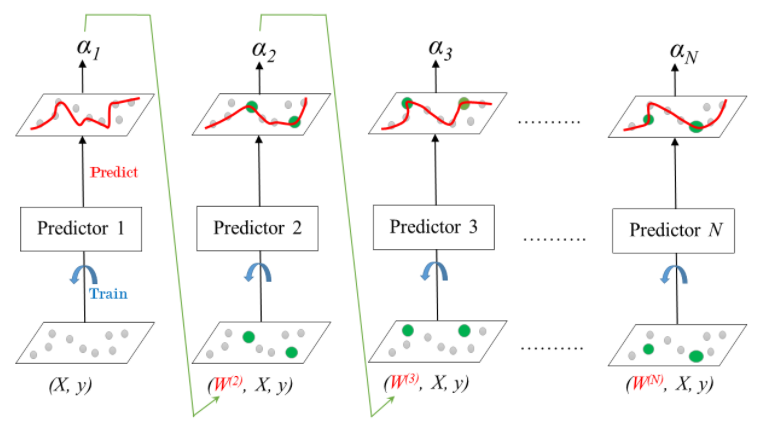

Un parametro importante es el __Learning rate__ eta, que es usado para disminuir el valor de alpha

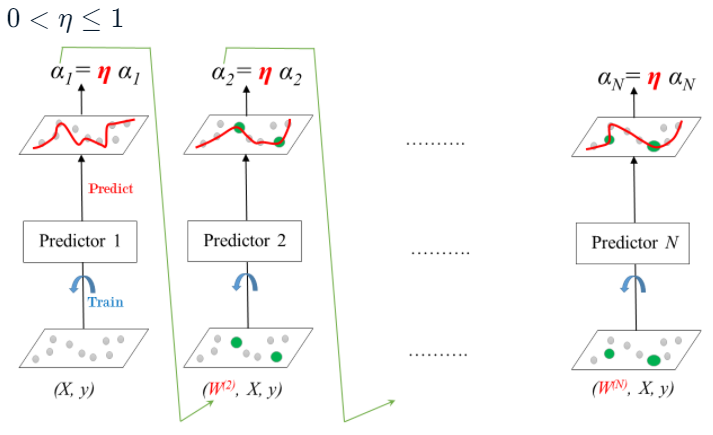

__NOTA__: Existe un trade-off entre __eta__ y el número de estimadores, un valor pequeño de __eta__ es compensado con una cantidad grande de estimadores

Ejemplo para usar AdaBoost en scikit learn

```python
from sklearn.ensemble import AdaBoostClassifier # para clasificación
from sklearn.ensemble import AdaBoostRegressor # para regresión
```

In [ ]:
# Cargamos los datos
cancer = pd.read_csv('https://raw.githubusercontent.com/edroga/Datasets_for_projects/main/cancer.csv')

# obtenemos dummies
cancer_dummies = (pd.get_dummies(cancer,
                                columns = ['diagnosis'],
                                drop_first = [True],
                                prefix = ['D'])
                  .loc[:,['D_M','radius_mean', 'concave points_mean']]
                  )

In [ ]:
# obtenemos los arreglos numpy
X = cancer_dummies.copy().drop(columns=['D_M']).values
y = cancer_dummies.copy()['D_M'].values

In [ ]:
# Importamos los modelos
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# partimos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=123)

In [ ]:
# Instanciamos un classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=2, 
                            random_state=123)
# Instanciamos AdaBoost classifier 'adab_clf'
adb_clf = AdaBoostClassifier(base_estimator=dt, 
                             n_estimators=100)

In [ ]:
# Ajustamos el modelo
adb_clf.fit(X_train, y_train)
# generamos pronosticos
y_pred = adb_clf.predict(X_test)

In [ ]:
# obtenemos accuracy
print('accuracy: ', accuracy_score(y_test, y_pred))
print('-'*30)
# obtenemos precision
print('precision:', precision_score(y_test, y_pred))
print('-'*30)
# obtenemos recall
print('recall:   ', recall_score(y_test, y_pred))
print('-'*30)
# obtenemos f1
print('f1:       ', f1_score(y_test, y_pred))

accuracy:  0.9122807017543859
------------------------------
precision: 0.855072463768116
------------------------------
recall:    0.921875
------------------------------
f1:        0.887218045112782


### Gradient Boosting

Otro método de ensemble es Boosting. Aquí, en lugar de construir 200 estimadores en paralelo (como en Randmo Forest), construimos una cadena de 200 estimadores que iterativamente van refinando los resultados del estimador anterior. La idea de boosting es que, utilizar modelos muy simples y rápidos secuencialmente nos permite obtener un error menor que el que pueden obtener los distintos estimadores individualmente.

* Con __Gradient Boosting__, cada predictor del conjunto corrige el error de su predecesor. 

* A diferencia de AdaBoost, los pesos de las instancias de entrenamiento no se modifican. 

* Cada predictor se entrena utilizando los errores residuales de su predecesor como etiquetas. 

* El algoritmo base es un CART.

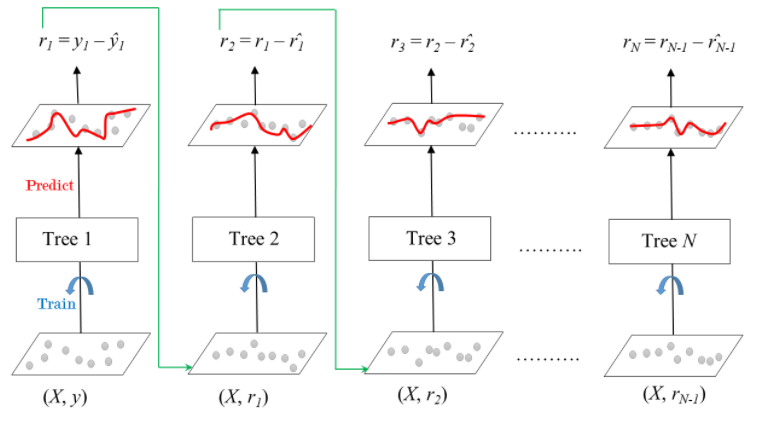

Un parametro importante es el Learning rate eta, que es usado para disminuir el error, similar a lo que ocurre en AdaBoost, hay un trade-off entre eta y el número de estimadores, disminuir el __learning rate__ debe ser compensado con un incremento del número de estimadores para que el módelo tenga un buen performance

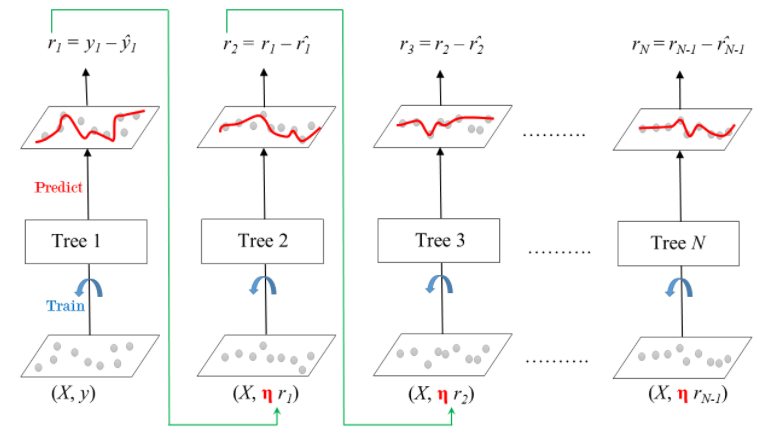

Una vez que todos los arboles en el ensemble fueron entrenados, se pueden hacer predicciones, y la predicción final del ensemble está dada por:

$$
y_{pred} = y_1 + \eta r_1 + ... + \eta r_N
$$


Ejemplo para usar Gradient Boosting en scikit learn

```python
from sklearn.ensemble import GradientBoostingClassifier # para clasificación
from sklearn.ensemble import GradientBoostingRegressor # para regresión
```

In [ ]:
# Importamos los modelos
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
# Cargamos los datos

auto = (pd.read_csv('https://raw.githubusercontent.com/edroga/Datasets_for_projects/main/mpg.csv')
        .dropna()
        .loc[:,['displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'cylinders', 'mpg']]
        )

# binarizamos las columnas
auto = pd.get_dummies(auto,
                   columns = ['origin'],
                   drop_first = [True],
                   prefix = ['o']
                   )

# obtenemos los arreglos numpy
X = auto.copy().drop(columns=['mpg']).values
y = auto.copy()['mpg'].values

In [ ]:
# partimos en train y test
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=123)

In [ ]:
# Instanciamos un GradientBoostingRegressor 'gbt'
gbt = GradientBoostingRegressor(n_estimators=300, 
                                max_depth=2,
                                learning_rate = 0.01, 
                                random_state=123)

In [ ]:
?GradientBoostingRegressor

In [ ]:
# Ajustamos el modelo
gbt.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=2, n_estimators=300,
                          random_state=123)

In [ ]:
# Generamos pronosticos
y_pred = gbt.predict(X_test)

In [ ]:
# Evaluamos RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)
rmse_test

3.1230874535631474

### Stochastic Gradient Boosting

Gradient Boosting implica un exhaustivo procedimiento de búsqueda. Cada árbol del conjunto está capacitado para encontrar los mejores puntos de división y las mejores variables. Este procedimiento puede hacer que CART use los mismos puntos de división y posiblemente las mismas variables.

Para mitigar estos efectos, se puede usar Stochastic Gradient Boosting. En este algoritmo, cada CART se entrena en un subconjunto aleatorio de los datos de entrenamiento. Este subconjunto se muestrea sin reemplazo. Además, a nivel de cada nodo, las variables se muestrean sin reemplazo al elegir los mejores puntos de división. Como resultado, esto crea una mayor diversidad en el conjunto y el efecto neto agrega más variación al ensemble de árboles.

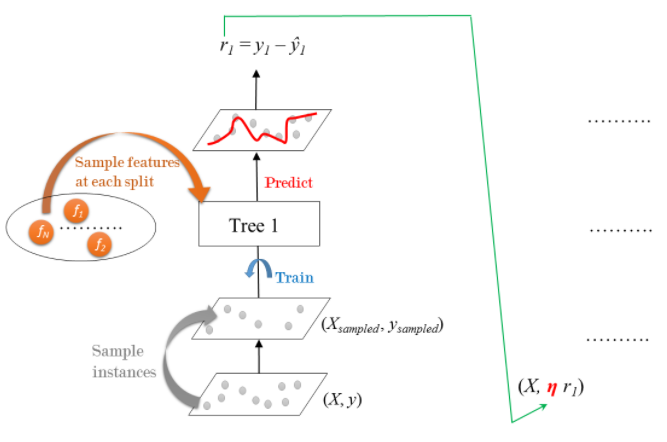

se usa de forma similar a __Gradient boosting__ pero se especifican los parametros:

* __`subsample`__: usado para tomar la muestra del training set.
* __`max_features`__: usado para tomar una muestra de esa cantidad de variables.

In [ ]:
# Importamos los modelos
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split  
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
# Partimos en train y test
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=123)

In [ ]:
# Instanciamos el stochastic GradientBoostingRegressor 'sgbt'
sgbt = GradientBoostingRegressor(max_depth=3,
                                 subsample=0.8,
                                 max_features=0.2,
                                 n_estimators=300,
                                 random_state=123,
                                 learning_rate = 0.01)

In [ ]:
# Ajustamos el modelo
sgbt.fit(X_train, y_train)

In [ ]:
# Generamos pronosticos
y_pred = sgbt.predict(X_test)

In [ ]:
# Evaluate RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)
rmse_test

### [XGBoost](https://xgboost.readthedocs.io/en/stable/index.html)

```python
import xgboost as xgb

xgb.XGBClassifier() # para clasificación
xgb.XGBRegressor() # para regresión
```

* Escrito en C++
* Tiene APIs en muchos lenguajes:
  * Python
  * R
  * Scala
  * Julia
  * Java

* Es muy rapido
* Su algoritmo core es paralelizable
* Consistentemente tiene un mejor performance que los modelos vistos anteriormente

In [ ]:
cancer = pd.read_csv('https://raw.githubusercontent.com/edroga/Datasets_for_projects/main/cancer.csv')

cancer_dummies = (pd.get_dummies(cancer,
                                columns = ['diagnosis'],
                                drop_first = [True],
                                prefix = ['D'])
                  .loc[:,['D_M','radius_mean', 'concave points_mean']]
                  )

In [ ]:
X = cancer_dummies.copy().drop(columns=['D_M']).values
y = cancer_dummies.copy()['D_M'].values

In [ ]:
# Create the training and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
import xgboost as xgb

In [ ]:
# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='binary:logistic', 
                          n_estimators=100, 
                          seed=123,
                          learning_rate = 0.01)

# Fit the classifier to the training set
xg_cl.fit(X_train, y_train)

# Predict the labels of the test set: preds
y_pred = xg_cl.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9035087719298246
0.8409090909090909
0.9024390243902439
0.8705882352941177


### [CatBoost](https://catboost.ai/en/docs/)

```python
from catboost import CatBoostClassifier # para clasificación
from sklearn.ensemble import CatBoostRegressor # para regresión
```

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [ ]:
cancer = pd.read_csv('https://raw.githubusercontent.com/edroga/Datasets_for_projects/main/cancer.csv')

cancer_dummies = (pd.get_dummies(cancer,
                                columns = ['diagnosis'],
                                drop_first = [True],
                                prefix = ['D'])
                  .loc[:,['D_M','radius_mean', 'concave points_mean']]
                  )

In [ ]:
X = cancer_dummies.copy().drop(columns=['D_M']).values
y = cancer_dummies.copy()['D_M'].values

In [ ]:
# Create the training and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
clf = CatBoostClassifier(iterations=5, 
                         learning_rate=0.1, 
                         #loss_function='CrossEntropy'
                         )

In [ ]:
clf.fit(X_train, y_train, 
        # cat_features=cat_features, 
        # eval_set=(X_test, y_test), 
        verbose=False)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9298245614035088
0.9714285714285714
0.8292682926829268
0.8947368421052632


### [LightGBM](https://lightgbm.readthedocs.io/en/latest/#)

```python
import lightgbm as lgb

lgb.LGBMClassifier # para clasificación
lgb.LGBMRegressor # para regresión
```

In [ ]:
cancer = pd.read_csv('https://raw.githubusercontent.com/edroga/Datasets_for_projects/main/cancer.csv')

cancer_dummies = (pd.get_dummies(cancer,
                                columns = ['diagnosis'],
                                drop_first = [True],
                                prefix = ['D'])
                  .loc[:,['D_M','radius_mean', 'concave points_mean']]
                  )

In [ ]:
X = cancer_dummies.copy().drop(columns=['D_M']).values
y = cancer_dummies.copy()['D_M'].values

In [ ]:
# Create the training and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
import lightgbm as lgb

In [ ]:
clf = lgb.LGBMClassifier()

In [ ]:
clf.fit(X_train, y_train)

LGBMClassifier()

In [ ]:
# predict the results
y_pred=clf.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9122807017543859
0.9428571428571428
0.8048780487804879
0.868421052631579


## Ejericios

Recursos: [Notas Curso Luis Felipe ITAM](https://felipegonzalez.github.io/aprendizaje-maquina-mcd-2018/index.html)

### Ejercicio 01

Considera los datos de `cancer.csv` y el tratamiento que se le dio en los ejercicos a los datos, ajusta cada uno de los modelos vistos y crea un dataframe que permita comparar las metricas obtenidas

In [ ]:
# Respuesta

### Ejercicio 02

Considera los datos de `auto.csv` y el tratamiento que se le dio en los ejercicos a los datos, ajusta cada uno de los modelos vistos y crea un dataframe que permita comparar las metricas obtenidas

In [ ]:
# Respuesta